> 2번 카테고리 선정 설명해야해 
카테고리1=제조 국가, 카테고리2=제조사, 뭐 이런 걸로 생각하면 된다. 

디지털프라자 A지점에서 최근 연휴 직전에 재고 처리와 매출 신장을 위해 대대적인 할인 행사를 하였다. 하루만 반짝 진행한 행사에서 예상보다 많은 손님이 방문했고 이번에 발생한 매출데이터를 취합하여 향후 발송할 판촉물에 들어갈 컨텐츠를 기획하고자 한다. 취합한 데이터는 다음과 같다.

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
import pandas as pd
df_origin = pd.read_csv("../Datasets/sales_pos.csv")
df_origin.head(2)

user       prod gender age_group  job city  marital  prod_cat1  prod_cat2  \
0     1  P00069042      F      0-17   10    A        0          3        NaN   
1     1  P00248942      F      0-17   10    A        0          1        6.0   

   prod_cat3  purchase  
0        NaN      8370  
1       14.0     15200

In [6]:
df = df_origin.copy()

### Q1. 매출액이 가장 큰 상품을 확인하고 해당 상품을 가장 많이 구매하는 직업을 확인하시오.
※ 분석 결과를 기반으로 job 변수의 번호를 최종 출력하시오.  
(정답 예시: 1)

In [9]:
df1 = df[["job", "prod", "purchase"]].copy()
df1.head(2)

job       prod  purchase
0   10  P00069042      8370
1   10  P00248942     15200

Q. prod가 중복되려나?

In [11]:
df1['prod'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: prod, Length: 3631, dtype: int64

> 그룹바이 써야겠네

In [63]:
df1.groupby('prod')['purchase'].sum().sort_values(ascending=False).idxmax()

'P00025442'

> sort_values 꼭 하고 해야 한다. idxmax 할 때 중복으로 가장 높은 데이터가 있으면 첫번째 인덱스만 가져온다

In [152]:
pd.Series(index=['a','b','c'], data=[1,4,4])

a    1
b    4
c    4
dtype: int64

In [66]:
pd.Series(index=['a','b','c'], data=[1,4,4]).idxmax()

'b'

In [67]:
prod_high=df1.groupby('prod')['purchase'].sum().sort_values(ascending=False).idxmax()

In [75]:
df1.loc[df1['prod']==prod_high]['job'].value_counts().idxmax()

4

### Q2. 결혼 여부(marital)에 따라 구매하는 물품의 종류가 많이 차이 나는지 확인하고자 한다. 비교적 신혼부부가 많은 26-35세 그룹을 대상으로 각 고객의 구매물품 카테고리 개수를 산출하고 결혼여부별로 그 평균값의 차이를 산출하시오.
※ 구매 물품의 카테고리 개수 산출에는 prod_cat1, prod_cat2, prod_cat3 변수를 사용한다.  
※ 카테고리 관련 변수의 결측치는 0으로 대치한다.  
※ 결측치를 대치한 데이터까지 포함하여 문제를 풀이하시오.  
※ 카테고리 관련 변수의 처리 예시는 다음과 같다.  
<div style='width:300px;'>
    
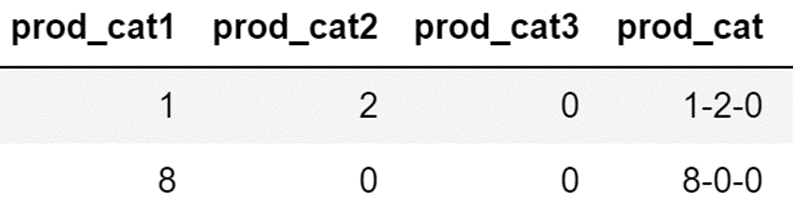
    
</div>
    
※ 고객 식별자가 1인 고객은 총 21개 카테고리의 물품을 구매하였다.  
※ 정답은 절대값을 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [119]:
df2 = df.copy()

In [120]:
df2.head(2)

user       prod gender age_group  job city  marital  prod_cat1  prod_cat2  \
0     1  P00069042      F      0-17   10    A        0          3        NaN   
1     1  P00248942      F      0-17   10    A        0          1        6.0   

   prod_cat3  purchase  
0        NaN      8370  
1       14.0     15200

※ 카테고리 관련 변수의 결측치는 0으로 대치한다.  

※ 결측치를 대치한 데이터까지 포함하여 문제를 풀이하시오.  

In [121]:
col_extract=['prod_cat1','prod_cat2','prod_cat3']

In [122]:
df2[col_extract]=df2[col_extract].fillna(0)

In [123]:
df2.head(2)

user       prod gender age_group  job city  marital  prod_cat1  prod_cat2  \
0     1  P00069042      F      0-17   10    A        0          3        0.0   
1     1  P00248942      F      0-17   10    A        0          1        6.0   

   prod_cat3  purchase  
0        0.0      8370  
1       14.0     15200

※ 고객 식별자가 1인 고객은 총 21개 카테고리의 물품을 구매하였다.  
※ 구매 물품의 카테고리 개수 산출에는 prod_cat1, prod_cat2, prod_cat3 변수를 사용한다.  

In [124]:
df2['unique_cate']=df2[col_extract].apply(lambda s:s.astype('str')).sum(axis=1)

In [132]:
df2.loc[df2["user"] == 1, 'unique_cate'].unique().shape

(21,)

비교적 신혼부부가 많은 26-35세 그룹을 대상으로 각 고객의 구매물품 카테고리 개수를 산출하고 결혼여부별로 그 평균값의 차이를 산출하시오.  
※ 정답은 절대값을 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [134]:
df2.head(2)

user       prod gender age_group  job city  marital  prod_cat1  prod_cat2  \
0     1  P00069042      F      0-17   10    A        0          3        0.0   
1     1  P00248942      F      0-17   10    A        0          1        6.0   

   prod_cat3  purchase unique_cate  
0        0.0      8370     30.00.0  
1       14.0     15200    16.014.0

In [135]:
df2.age_group.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [136]:
df2 = df2.loc[df2.age_group=='26-35']

In [145]:
s_groupby=df2.groupby(['user','marital'])['unique_cate'].nunique()

In [146]:
s_groupby.head(2)

user  marital
3     0          18
5     1          43
Name: unique_cate, dtype: int64

In [149]:
s_groupby.groupby('marital').mean()

marital
0    41.663183
1    41.792336
Name: unique_cate, dtype: float64

In [154]:
s_groupby.groupby('marital').mean().diff().abs().round(2)

marital
0     NaN
1    0.13
Name: unique_cate, dtype: float64

A. 0.13

### Q3. 고객을 군집화 하여 각 군집별로 마케팅 전략을 수립하고자 한다. 다음에 제시된 변수를 대상으로 k-means 군집분석을 실시하고 7개 군집으로 분석했을 때 Silhouette score 를 산출하시오.
<독립 변수>
 - 구매 상품 종류
 - 성별
 - 나이
 - 직업 
 - 도시
 - 결혼 여부
 - 총 구매금액

※ 구매 상품 종류 변수는 "prod" 변수를 참고하여 생성하시오.  
※ 성별 변수는 "gender" 변수에서 "M"을 1, "F"를 0으로 변환하여 사용하시오.  
※ 나이는 "age_group" 변수에서 나이가 가장 적은 그룹을 0으로 지정하고 가장 나이가 많은 그룹은 6으로 지정하는 방식으로 순서형 변수로 변환하시오.  
※ 직업과 도시 변수는 One Hot Encoding 변환하여 사용하시오.  
※ 군집 분석에 사용되는 변수는 총 29개이며 MinMax 정규화 후 분석하시오.  
※ seed는 123으로 지정하시오.  
※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [156]:
df3 = df.copy()
df3.head(2)

user       prod gender age_group  job city  marital  prod_cat1  prod_cat2  \
0     1  P00069042      F      0-17   10    A        0          3        NaN   
1     1  P00248942      F      0-17   10    A        0          1        6.0   

   prod_cat3  purchase  
0        NaN      8370  
1       14.0     15200

※ seed는 123으로 지정하시오.  
7개 군집으로 분석했을 때

In [161]:
k, seed = 7, 123

고객별이니깐!!!!!!!!!!!!!!!!!!! 고객 기준으로 한 행에 한 사람이 나와야 된다. 고객 기준 중복되는 데이터를 일단 없애자.

In [178]:
df3=df3.drop(columns=col_extract)

In [180]:
df3[df3.user==1]

user       prod gender age_group  job city  marital  purchase
0          1  P00069042      F      0-17   10    A        0      8370
1          1  P00248942      F      0-17   10    A        0     15200
2          1  P00087842      F      0-17   10    A        0      1422
3          1  P00085442      F      0-17   10    A        0      1057
39180      1  P00085942      F      0-17   10    A        0     12842
78144      1  P00102642      F      0-17   10    A        0      2763
78145      1  P00110842      F      0-17   10    A        0     11769
78146      1  P00004842      F      0-17   10    A        0     13645
116848     1  P00117942      F      0-17   10    A        0      8839
116849     1  P00258742      F      0-17   10    A        0      6910
116850     1  P00142242      F      0-17   10    A        0      7882
116851     1  P00000142      F      0-17   10    A        0     13650
155570     1  P00297042      F      0-17   10    A        0      7839
155571     1  P00059442      F      0-17   10    A        0     16622
155572     1   P0096542      F      0-17   10    A        0     13627
194558     1  P00184942      F      0-17   10    A        0     19219
194559     1  P00051842      F      0-17   10    A        0      2849
233726     1  P00214842      F      0-17   10    A        0     11011
233727     1  P00165942      F      0-17   10    A        0     10003
233728     1  P00111842      F      0-17   10    A        0      8094
272808     1  P00178242      F      0-17   10    A        0      9946
311709     1  P00178342      F      0-17   10    A        0      7887
311710     1  P00183942      F      0-17   10    A        0     10872
311711     1  P00051442      F      0-17   10    A        0      9938
311712     1  P00248442      F      0-17   10    A        0      7943
311713     1  P00210342      F      0-17   10    A        0     11039
350797     1  P00289942      F      0-17   10    A        0     10900
390150     1   P0097142      F      0-17   10    A        0      1715
390151     1  P00255842      F      0-17   10    A        0     16446
428893     1  P00025442      F      0-17   10    A        0     15416
428894     1  P00074142      F      0-17   10    A        0     10572
467663     1  P00058142      F      0-17   10    A        0     11051
467664     1  P00220642      F      0-17   10    A        0      7953
506601     1  P00064042      F      0-17   10    A        0      8190
545915     1  P00375436      F      0-17   10    A        0       612

> prod 랑 purchase 빼고 다 똑같네

In [223]:
df3['user'].nunique()

5891

In [235]:
df_user=df3.drop(columns=['prod','purchase']).drop_duplicates()

※ 성별 변수는 "gender" 변수에서 "M"을 1, "F"를 0으로 변환하여 사용하시오.  
※ 나이는 "age_group" 변수에서 나이가 가장 적은 그룹을 0으로 지정하고 가장 나이가 많은 그룹은 6으로 지정하는 방식으로 순서형 변수로 변환하시오.  

In [236]:
df_user['age_group'].unique()df_user['gender']=df_user['gender'].replace({'M':1, 'F':0})

In [74]:
df_user['age_group'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [237]:
dict_age=dict(pd.Series([0, 6, 2, 4, 5, 3, 1], index=df_user['age_group'].unique() ))

In [238]:
df_user['age_group']=df_user['age_group'].replace(dict_age)

※ 직업과 도시 변수는 One Hot Encoding 변환하여 사용하시오.  

In [239]:
df_user=pd.get_dummies(df_user)

In [240]:
df_user.head()

user  gender  age_group  job  marital  city_A  city_B  city_C
0     1       0          0   10        0       1       0       0
4     2       1          6   16        0       0       0       1
5     3       1          2   15        0       1       0       0
6     4       1          4    7        1       0       1       0
9     5       1          2   20        1       1       0       0

> 엥 job은 안됐네 get dummies가 dtype보고 결정함

In [241]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 243533
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user       5891 non-null   int64
 1   gender     5891 non-null   int64
 2   age_group  5891 non-null   int64
 3   job        5891 non-null   int64
 4   marital    5891 non-null   int64
 5   city_A     5891 non-null   uint8
 6   city_B     5891 non-null   uint8
 7   city_C     5891 non-null   uint8
dtypes: int64(5), uint8(3)
memory usage: 293.4 KB


In [242]:
df_user['job']=df_user['job'].astype('str')

In [244]:
df_user=pd.get_dummies(df_user)

※ 구매 상품 종류 변수는 "prod" 변수를 참고하여 생성하시오.  

In [246]:
s_prod_nunique=df3.groupby('user')['prod'].nunique()

In [247]:
df_user=df_user.merge(s_prod_nunique, on='user', how='left')

독립변수 총 구매금액

In [248]:
s_sum_purchase = df3.groupby('user')['purchase'].sum()

In [249]:
df_user=df_user.merge(s_sum_purchase, on='user', how='left')

In [250]:
df_user

user  gender  age_group  marital  city_A  city_B  city_C  job_0  job_1  \
0        1       0          0        0       1       0       0      0      0   
1        2       1          6        0       0       0       1      0      0   
2        3       1          2        0       1       0       0      0      0   
3        4       1          4        1       0       1       0      0      0   
4        5       1          2        1       1       0       0      0      0   
...    ...     ...        ...      ...     ...     ...     ...    ...    ...   
5886  4588       0          2        0       0       0       1      0      0   
5887  4871       1          1        0       0       0       1      0      0   
5888  4113       1          3        0       0       0       1      0      0   
5889  5391       1          2        0       1       0       0      0      0   
5890  1529       1          1        1       0       0       1      0      0   

      job_10  ...  job_20  job_3  job_4  job_5  job_6  job_7  job_8  job_9  \
0          1  ...       0      0      0      0      0      0      0      0   
1          0  ...       0      0      0      0      0      0      0      0   
2          0  ...       0      0      0      0      0      0      0      0   
3          0  ...       0      0      0      0      0      1      0      0   
4          0  ...       1      0      0      0      0      0      0      0   
...      ...  ...     ...    ...    ...    ...    ...    ...    ...    ...   
5886       0  ...       0      0      1      0      0      0      0      0   
5887       0  ...       0      0      0      0      0      0      0      0   
5888       0  ...       0      0      0      0      0      0      0      0   
5889       0  ...       0      0      0      0      0      1      0      0   
5890       0  ...       0      0      1      0      0      0      0      0   

      prod  purchase  
0       35    334093  
1       77    810472  
2       29    341635  
3       14    206468  
4      106    821001  
...    ...       ...  
5886    20    140990  
5887    12    108545  
5888    20    213550  
5889     7     60182  
5890    13    152942  

[5891 rows x 30 columns]

※ 군집 분석에 사용되는 변수는 총 29개이며 MinMax 정규화 후 분석하시오.  

In [1]:
df_user=df_user.drop(columns='user')

NameError: name 'df_user' is not defined

In [260]:
scaler_mm = MinMaxScaler()

In [262]:
df_user=scaler_mm.fit_transform(df_user)

k-means 군집분석을 실시하고 7개 군집으로 분석했을 때 Silhouette score 를 산출하시오.  
※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.    
(정답 예시: 0.12)

In [263]:
model_kmeans=KMeans(n_clusters=k, random_state=seed)

In [264]:
model_kmeans.fit(df_user)

C:\Users\beluga\miniconda3\envs\s0921\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=123)

In [265]:
round(silhouette_score(df_user, model_kmeans.labels_), 2)

0.18